<a href="https://colab.research.google.com/github/veronica2504/Data_analyst_python/blob/main/Superstore_con_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analizando la base de datos Superstore**


# Importación de datos e identificación de variables a limpiar

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_files_urls = [
    "https://drive.google.com/file/d/1ZCnKcFKMMYJiacAIiZKgTyaNRxDwN3HQ/view?usp=drive_link",
    "https://drive.google.com/file/d/1l2RQU0XLq2hhxomopz5JN6eoRFJbzW7J/view?usp=drive_link",
    "https://drive.google.com/file/d/1N5M3voDBLxVPb8ku4nmefUTKM4vC6UmV/view?usp=drive_link",
    "https://drive.google.com/file/d/16DdIiZGbt2amYU-VLShVCG3SBZyglcRN/view?usp=drive_link",
    "https://drive.google.com/file/d/1ie_DuEhxqi-X0ZZve_zFUTRB8gCaRYVt/view?usp=drive_link",
    "https://drive.google.com/file/d/1EgT_QmIzQFZv9mlB5kqrL9yBdGkl5_1S/view?usp=drive_link"
]

def get_df_from_csv_from_google_drive(url):
    url='https://drive.google.com/uc?id=' + url.split('/')[-2]
    return pd.read_csv(url, encoding = "ISO-8859-1")

df_final = pd.DataFrame()
for csv_file_url in csv_files_urls:
    df = get_df_from_csv_from_google_drive(csv_file_url)
    df_final = pd.concat([df_final, df])
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61550 entries, 0 to 10259
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          61550 non-null  int64  
 1   Order ID        61550 non-null  object 
 2   Order Date      61550 non-null  object 
 3   Ship Date       61550 non-null  object 
 4   Ship Mode       61550 non-null  object 
 5   Customer ID     61550 non-null  object 
 6   Customer Name   61550 non-null  object 
 7   Segment         61550 non-null  object 
 8   City            61550 non-null  object 
 9   State           61550 non-null  object 
 10  Country         61550 non-null  object 
 11  Postal Code     11899 non-null  float64
 12  Market          61550 non-null  object 
 13  Region          61550 non-null  object 
 14  Product ID      61550 non-null  object 
 15  Category        61550 non-null  object 
 16  Sub-Category    61550 non-null  object 
 17  Product Name    61550 non-null 

In [ ]:
df_final.head(11)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.7700,4.70,Medium
5,22254,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium
6,21613,IN-2011-30733,1/2/2011,3/2/2011,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,...,TEC-CO-10002316,Technology,Copiers,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical
7,34662,CA-2011-115161,1/2/2011,3/2/2011,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,...,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High
8,44508,AO-2011-1390,1/2/2011,4/2/2011,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,...,OFF-FEL-10001541,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical
9,23688,ID-2011-56493,1/2/2011,3/2/2011,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,...,OFF-ST-10002161,Office Supplies,Storage,"Tenex Trays, Single Width",162.720,3,0.00,68.3100,44.36,Critical


In [ ]:
df_final.iloc[:, :15]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,528,MX-2013-168858,19-06-2013,24-06-2013,Standard Class,CA-12775,Cynthia Arntzen,Consumer,Santiago de Cuba,Santiago de Cuba,Cuba,NaN,LATAM,Caribbean,FUR-BO-10003631
10256,25903,IN-2013-39231,19-06-2013,24-06-2013,Second Class,KB-16585,Ken Black,Corporate,Devonport,Tasmania,Australia,NaN,APAC,Oceania,TEC-MA-10002340
10257,21801,IN-2013-78081,19-06-2013,23-06-2013,Standard Class,CS-12355,Christine Sundaresam,Consumer,Manila,National Capital,Philippines,NaN,APAC,Southeast Asia,TEC-PH-10004281
10258,29659,IN-2013-53455,19-06-2013,23-06-2013,Standard Class,CR-12730,Craig Reiter,Consumer,Moradabad,Uttar Pradesh,India,NaN,APAC,Central Asia,TEC-PH-10002154


# Limpieza de Datos

In [ ]:
# 24 Columns and 61550 rows

# Remove Duplicates
df_final.drop_duplicates(inplace=True)
# Remove Columns
columns_to_drop=['Row ID', 'Postal Code']
df_modif=df_final.drop(columns_to_drop,axis=1)
df_modif.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 10249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        51290 non-null  object 
 1   Order Date      51290 non-null  object 
 2   Ship Date       51290 non-null  object 
 3   Ship Mode       51290 non-null  object 
 4   Customer ID     51290 non-null  object 
 5   Customer Name   51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Market          51290 non-null  object 
 11  Region          51290 non-null  object 
 12  Product ID      51290 non-null  object 
 13  Category        51290 non-null  object 
 14  Sub-Category    51290 non-null  object 
 15  Product Name    51290 non-null  object 
 16  Sales           51290 non-null  float64
 17  Quantity        51290 non-null 

In [ ]:
#Rendodeando a dos decimales el valor de las columnas "Sales", "Profit"
df_modif['Sales'] = df_modif['Sales'].round(2)
df_modif['Profit'] = df_modif['Profit'].round(2)


In [ ]:
df_modif.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [ ]:
df_modif.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.0,106.14,35.46,Medium
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.1,36.04,9.72,Medium
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.0,29.64,8.17,High
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.86,3,0.5,-26.06,4.82,High
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.1,37.77,4.70,Medium


In [ ]:
hay_nulos = df_modif.isnull().any().any()
if hay_nulos:
    print("El DataFrame contiene valores nulos.")
else:
    print("El DataFrame no contiene valores nulos.")

El DataFrame no contiene valores nulos.


# Creación de nueva base de datos en Google Drive

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/Database"

# Upload dataframe to a CSV file in the directory
df_modif.to_csv('/content/drive/My Drive/Database/dfsuperstore.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Explorando datos

Conectar a la nueva base de datos

In [ ]:
superstore_data = pd.read_csv('/content/drive/MyDrive/Database/dfsuperstore.csv')
superstore_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.0,106.14,35.46,Medium
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.1,36.04,9.72,Medium
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.0,29.64,8.17,High
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.86,3,0.5,-26.06,4.82,High
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.1,37.77,4.70,Medium


# Analizando algunas preguntas de negocio


 **Día de la semana con más ventas por año**

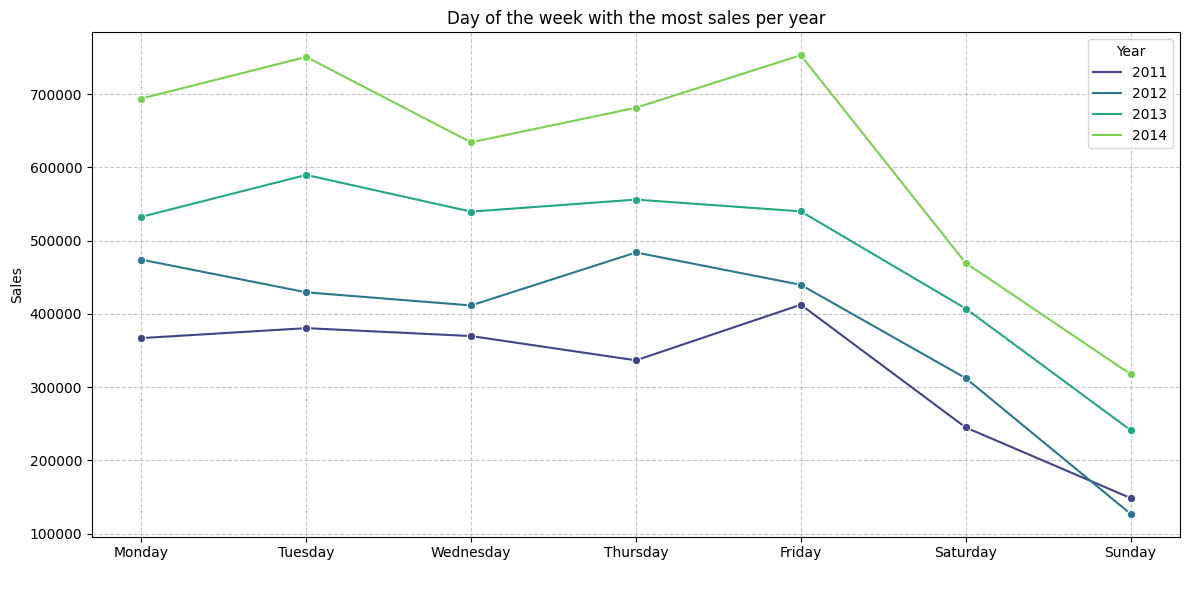

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

superstore_data['Año'] = superstore_data['Order Date'].dt.year
superstore_data['DiaSemana'] = superstore_data['Order Date'].dt.day_name()

ventas_por_dia_y_ano = superstore_data.groupby(['Año', 'DiaSemana'])['Sales'].sum().reset_index()

dias_semana_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_y_ano['DiaSemana'] = pd.Categorical(ventas_por_dia_y_ano['DiaSemana'], categories=dias_semana_ordenados, ordered=True)

colores = sns.color_palette('viridis', n_colors=len(ventas_por_dia_y_ano['Año'].unique()))

plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_por_dia_y_ano, x='DiaSemana', y='Sales', hue='Año', palette=colores, marker='o')

plt.title('Day of the week with the most sales per year')
plt.xlabel(' ')
plt.ylabel('Sales')
plt.legend(title='Year', loc='upper right')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


**Variación de la Ganancia Promedio por Categoría a lo largo de los** **años**

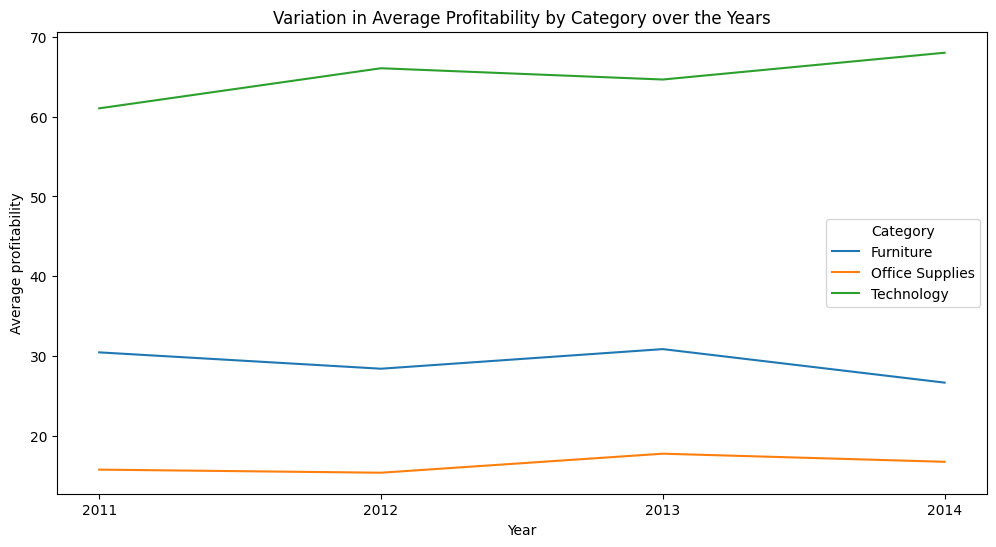

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

superstore_data['Año'] = superstore_data['Order Date'].dt.year

rentabilidad_promedio = superstore_data.groupby(['Category', 'Año'])['Profit'].mean().reset_index()

plt.figure(figsize=(12, 6))

for categoria, datos_categoria in rentabilidad_promedio.groupby('Category'):
    plt.plot(datos_categoria['Año'], datos_categoria['Profit'], label=categoria)

plt.title('Variation in Average Profitability by Category over the Years')
plt.xlabel('Year')
plt.ylabel('Average profitability')
plt.legend(title='Category', loc='center right')
plt.xticks(datos_categoria['Año'].unique(), rotation=0)

plt.show()


**Ganancia promedio por categoria**

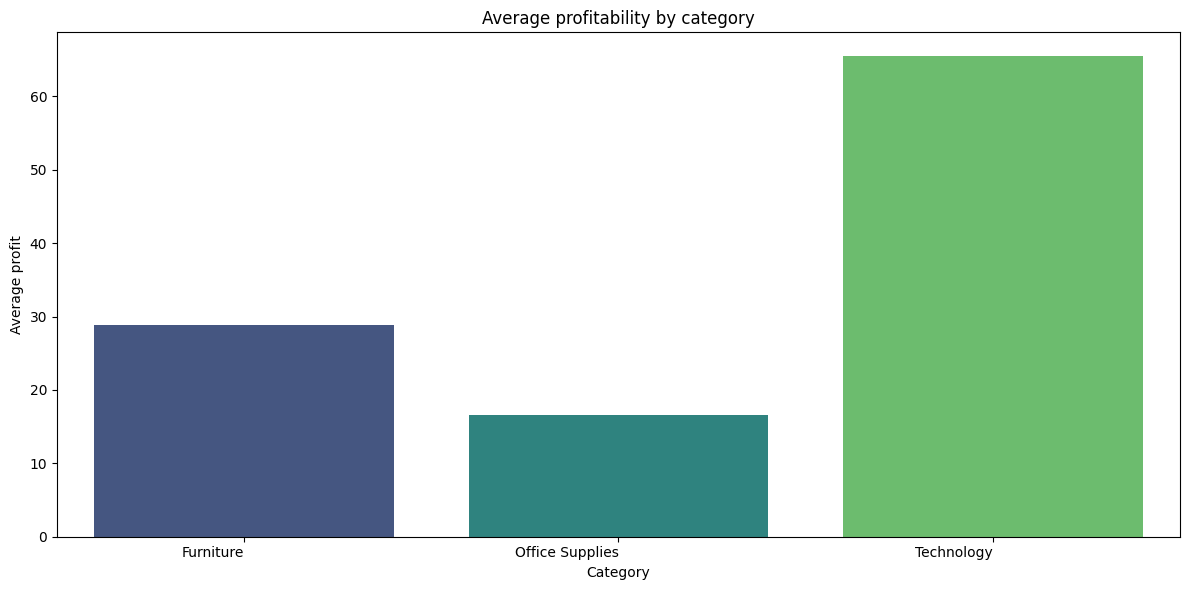

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rentabilidad_promedio_por_categoria = superstore_data.groupby('Category')['Profit'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=rentabilidad_promedio_por_categoria, x='Category', y='Profit', palette='viridis')

plt.title('Average profitability by category')
plt.xlabel('Category')
plt.ylabel('Average profit')

plt.xticks(rotation=0, ha='right')

plt.tight_layout()

plt.show()


**Tendencia de Ventas por Categoría a lo largo de los Años**

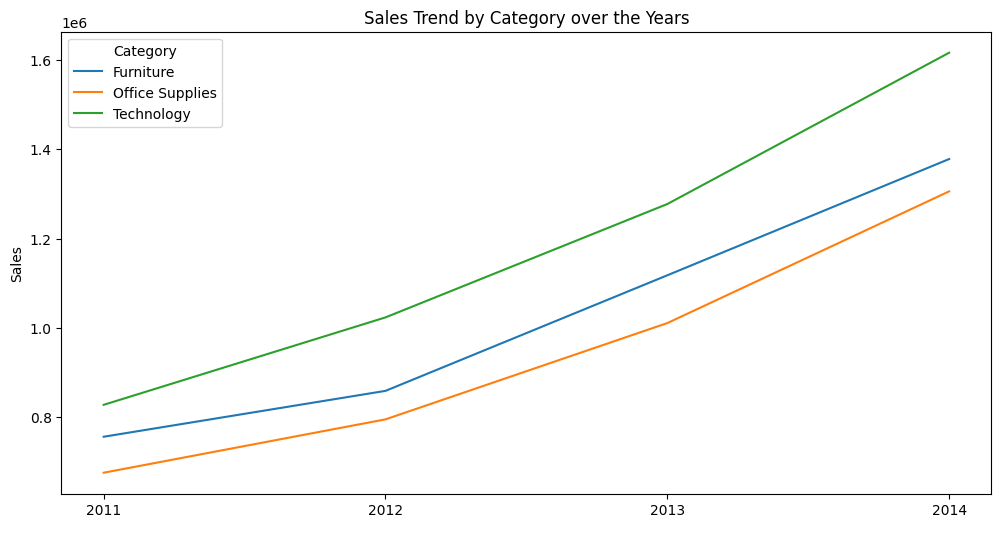

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

superstore_data['Año'] = superstore_data['Order Date'].dt.year

ventas_por_categoria_y_anio = superstore_data.groupby(['Category', 'Año'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=ventas_por_categoria_y_anio, x='Año', y='Sales', hue='Category')

plt.title('Sales Trend by Category over the Years')
plt.xlabel(' ')
plt.ylabel('Sales')

plt.xticks(ventas_por_categoria_y_anio['Año'].unique(), rotation=0)

plt.legend(title='Category', loc='upper left')
plt.show()


**Relación entre Ganancias y ventas**

<Figure size 1000x400 with 0 Axes>

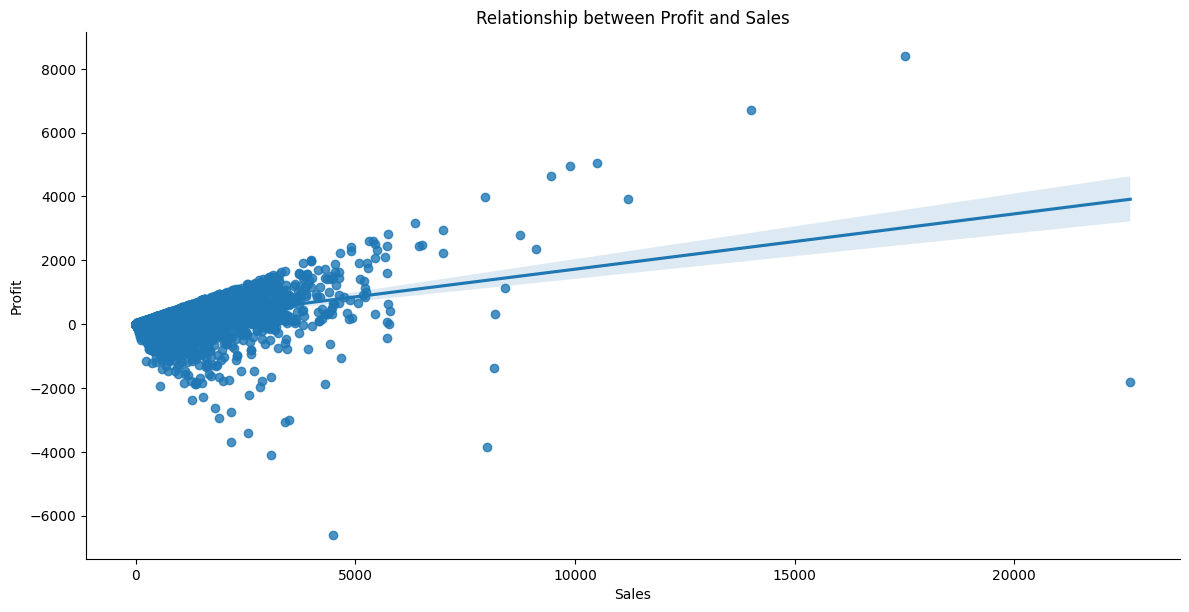

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.lmplot(data=superstore_data, x='Sales', y='Profit', height=6, aspect=2)

plt.title('Relationship between Profit and Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')

plt.show()


**Media de las ganancias por categoria**

In [ ]:
import numpy as np
import pandas as pd

media_beneficio_por_categoria = superstore_data.groupby('Category')['Profit'].mean().reset_index()

media_beneficio_por_categoria.rename(columns={'Profit': 'Media_Beneficio'}, inplace=True)

print(media_beneficio_por_categoria)


          Category  Media_Beneficio
0        Furniture        28.878535
1  Office Supplies        16.578929
2       Technology        65.455009


**Media de las ganancias por categoria y año**

In [ ]:
import numpy as np
import pandas as pd

superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

superstore_data['Año'] = superstore_data['Order Date'].dt.year

media_beneficio_por_categoria_y_anio = superstore_data.groupby(['Category', 'Año'])['Profit'].mean().reset_index()

media_beneficio_por_categoria_y_anio.rename(columns={'Profit': 'Media_Beneficio'}, inplace=True)

print(media_beneficio_por_categoria_y_anio)


           Category   Año  Media_Beneficio
0         Furniture  2011        30.474932
1         Furniture  2012        28.426782
2         Furniture  2013        30.882733
3         Furniture  2014        26.684198
4   Office Supplies  2011        15.790703
5   Office Supplies  2012        15.402651
6   Office Supplies  2013        17.786363
7   Office Supplies  2014        16.770038
8        Technology  2011        61.032128
9        Technology  2012        66.052919
10       Technology  2013        64.641299
11       Technology  2014        67.996602


**Ventas Anuales y Proyección para el año 2015**

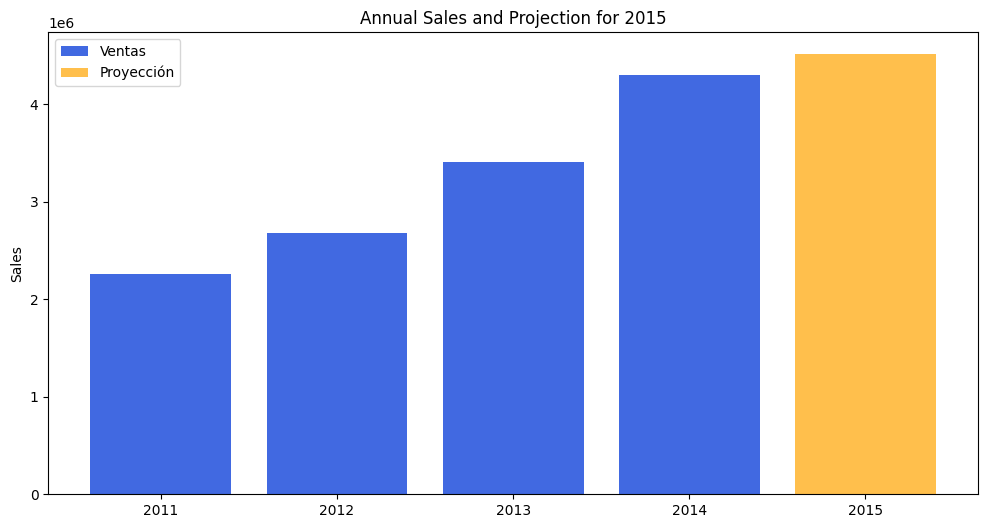

Proyección de ventas para el próximo año: 4514859.21


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

superstore_data['Año'] = superstore_data['Order Date'].dt.year

ventas_por_anio = superstore_data.groupby('Año')['Sales'].sum()

#(supongamos un crecimiento del 5%)
ultimo_anio = ventas_por_anio.index[-1]
proyeccion_proximo_anio = ventas_por_anio[ultimo_anio] * 1.05

proyeccion_df = pd.DataFrame({'Año': [ultimo_anio + 1], 'Proyección': [proyeccion_proximo_anio]})

ventas_por_anio = ventas_por_anio.reset_index()
ventas_por_anio = pd.concat([ventas_por_anio, proyeccion_df], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.bar(ventas_por_anio['Año'], ventas_por_anio['Sales'], color='royalblue', label='Ventas')
plt.bar(proyeccion_df['Año'], proyeccion_df['Proyección'], color='orange', label='Proyección', alpha=0.7)

plt.title('Annual Sales and Projection for 2015')
plt.xlabel('')
plt.ylabel('Sales')
plt.xticks(ventas_por_anio['Año'])
plt.legend()

plt.show()

print(f'Proyección de ventas para el próximo año: {proyeccion_proximo_anio:.2f}')


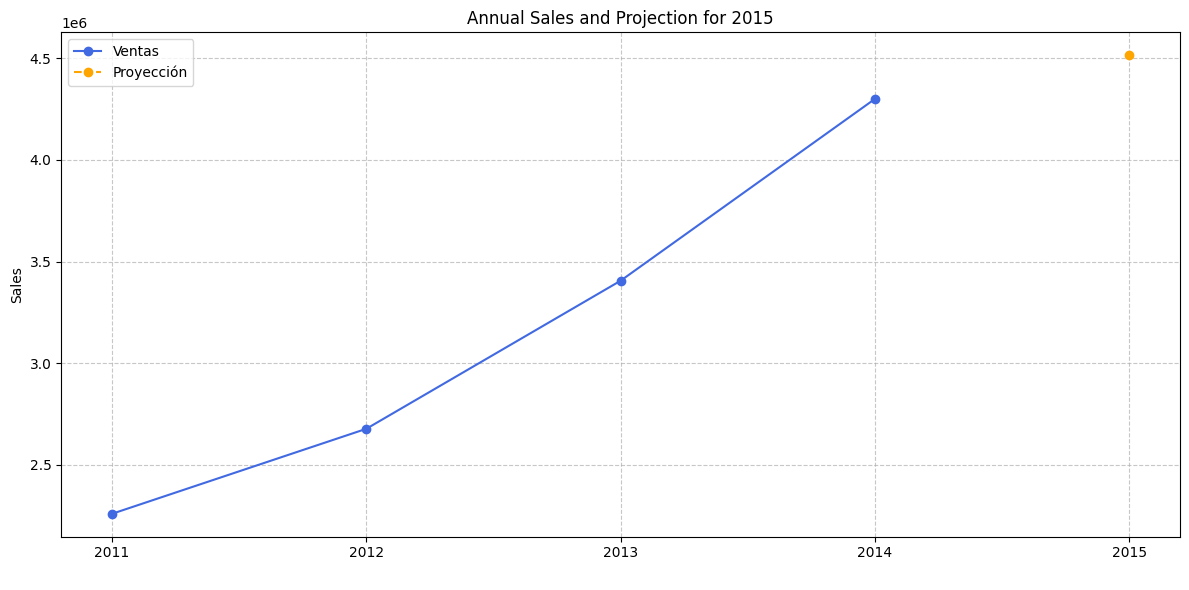

Proyección de ventas para el próximo año: 4514859.21


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

superstore_data['Año'] = superstore_data['Order Date'].dt.year

ventas_por_anio = superstore_data.groupby('Año')['Sales'].sum()

#(supongamos un crecimiento del 5%)
ultimo_anio = ventas_por_anio.index[-1]
proyeccion_proximo_anio = ventas_por_anio[ultimo_anio] * 1.05

proyeccion_df = pd.DataFrame({'Año': [ultimo_anio + 1], 'Proyección': [proyeccion_proximo_anio]})

ventas_por_anio = ventas_por_anio.reset_index()
ventas_por_anio = pd.concat([ventas_por_anio, proyeccion_df], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.plot(ventas_por_anio['Año'], ventas_por_anio['Sales'], marker='o', color='royalblue', label='Ventas')
plt.plot(proyeccion_df['Año'], proyeccion_df['Proyección'], linestyle='--', color='orange', label='Proyección', marker='o')

plt.title('Annual Sales and Projection for 2015')
plt.xlabel(' ')
plt.ylabel('Sales')
plt.xticks(ventas_por_anio['Año'])
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

print(f'Proyección de ventas para el próximo año: {proyeccion_proximo_anio:.2f}')


# Conclusiones

Con excepción del año 2012, se observa que el día de la semana con las ventas más altas es el viernes. El intervalo de ventas más significativo se sitúa generalmente entre el martes y el viernes, mientras que los sábados y domingos experimentan un nivel más bajo de actividad de ventas.

A lo largo de varios años, la variación en las ganancias por categoría se ha mantenido relativamente constante, destacando la categoría de tecnología como la que obtiene el promedio más alto de ganancias.

En el transcurso de los años, se observa una tendencia general de aumento en las ventas, sin experimentar disminuciones significativas. Este crecimiento sostenido es un indicio positivo para la empresa.

Respecto a la relación entre las ganancias y las ventas, se confirma que a medida que las ventas aumentan, las ganancias también tienden a ser más elevadas, lo cual es coherente con las expectativas. Sin embargo, es importante notar que las pérdidas se registran cuando las ventas son menores de 5000, lo que destaca la necesidad de mantener un flujo constante de ventas para garantizar la rentabilidad.

Si se proyecta un crecimiento del 5%, las ventas estimadas para el año 2015 serían de aproximadamente 4,514,859.21, lo que sugiere un aumento positivo en las ventas para ese año, siguiendo la tendencia de crecimiento previamente observada




